In [1]:
data_path = r''

In [2]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

image_file = os.path.join(data_path, r'TEV1P1CTI.mhd')

if not os.path.exists(image_file):
    print(f'The image could not be found. '
          f'Please check that the file TEV1P1CTI.mhd can be found in {data_path}')
else:
    image = sitk.ReadImage(image_file)
    image_array = sitk.GetArrayFromImage(image)
    image_array = np.swapaxes(image_array, 0, 2)

The image could not be found. Please check that the file TEV1P1CTI.mhd can be found in 


In [3]:
import scipy.ndimage as scnd
from IPython.display import display, clear_output

# Only consider one image slice
image_slice = image_array[:, :, 20].squeeze().transpose()

# Use Scipy to downsample the image by a factor 4
image_slice = scnd.zoom(image_slice, 0.25)

plt.title("Downsampled slice")
plt.imshow(image_slice, cmap="gray")
plt.show()

NameError: name 'image_array' is not defined

In [4]:
g = np.array([[0, 0, 0],
              [0, 0, 1],
              [0, 0, 0]])

In [5]:
filtered_image = image_slice

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

for level in range(20): # The kernel is applied 20 times
    filtered_image = scnd.correlate(filtered_image, g, mode='constant', cval=0)
    ax.imshow(filtered_image, cmap='gray', clim=[-300, 450])
    ax.set_title('Applied {} times'.format(level))
    display(fig)
    
    clear_output(wait = True)
    plt.pause(0.1)

NameError: name 'image_slice' is not defined

In [6]:
## FILL IN ⌨️

In [7]:
## FILL IN ⌨️

In [8]:
import torch

# Start with a NumPy array
a = np.array([1, 2, 3])
print(type(a))
print(a)

# Convert to PyTorch tensor
a_t = torch.from_numpy(a)
print(type(a_t))
print(a_t)

# Convert back to NumPy array
a = a_t.numpy()
print(type(a))
print(a)

<class 'numpy.ndarray'>
[1 2 3]
<class 'torch.Tensor'>
tensor([1, 2, 3])
<class 'numpy.ndarray'>
[1 2 3]


In [9]:
if torch.cuda.is_available():
    # CUDA
    gpu = torch.device('cuda:0')
else:
    # MacBook with >M1 chip
    gpu = torch.device('mps')

try:
    a_t = a_t.to(device=gpu)
except Exception:
    print("No GPU was found on your machine."
          "Use colab or JupyterLab to access a GPU.")

In [10]:
summed = a_t + torch.Tensor([4, 5, 6])

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, mps:0 and cpu!

In [11]:
## FILL IN ⌨️

In [12]:
rn = torch.randn(1000, 1000, device=gpu)
print(rn)

tensor([[-0.0638, -0.2740, -0.2550,  ..., -1.3183,  1.8581,  0.4693],
        [ 1.1373, -0.2019,  0.9434,  ..., -0.7667, -0.2665, -1.4010],
        [ 1.0566, -0.1939, -1.1355,  ...,  0.6827,  1.9851, -1.6877],
        ...,
        [ 0.5925, -1.2188, -0.0527,  ...,  0.0749,  1.1562, -0.5145],
        [-0.9962, -2.0976, -1.3885,  ..., -0.8756,  1.6811,  0.5753],
        [-0.9139,  0.1914,  0.3680,  ..., -1.8392,  0.3741, -0.3419]],
       device='mps:0')


/Users/jmwolterink/opt/anaconda3/envs/notebook_collaboration/lib/python3.7/site-packages/torch/_tensor_str.py:116: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  tensor_view, torch.isfinite(tensor_view) & tensor_view.ne(0)


In [13]:
import torch.nn.functional as F

image_slice_t = torch.from_numpy(image_slice).float()

g_t = torch.tensor([[0, 0, 0],
                    [0, 0, 1],
                    [0, 0, 0]]).float()

# We reshape the image because the conv2d function expects [batch_size, channels, width, height] inputs and kernels. You'll see 
# later what we mean with batch_size and channels.
filtered_image_t = F.conv2d(image_slice_t.reshape((1, 1, 128, 128)), g_t.reshape((1, 1, 3, 3)), padding='same').squeeze()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
for level in range(1, 20):
    filtered_image_t = F.conv2d(filtered_image_t.reshape((1, 1, 128, 128)), g_t.reshape((1, 1, 3, 3)), padding='same').squeeze()
    ax.imshow(filtered_image_t.numpy(), cmap='gray', clim=[-300, 450])
    ax.set_title('Applied {} times'.format(level))
    display(fig)
    
    clear_output(wait = True)
    plt.pause(0.1)

NameError: name 'image_slice' is not defined

In [14]:
## FILL IN ⌨️

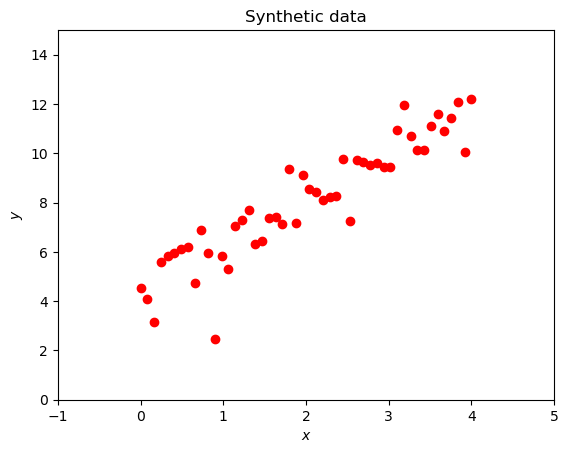

In [15]:
# Generation of a data set including N samples
N = 50
x = torch.linspace(0, 4, N, device=gpu)
b = 4
w = 2
noise = torch.normal(torch.zeros(N)).to(gpu)
y = (w * x + b + noise).float()

# Plot the synthetic data set
plt.figure()
plt.title("Synthetic data")
plt.scatter(x.cpu(), y.cpu(), color='r') # We use this code to map the data back to the CPU
plt.xlim(-1, 5)
plt.xlabel('$x$')
plt.ylim(0, 15)
plt.ylabel('$y$')
plt.show()

In [16]:
model = torch.nn.Linear(in_features=1, out_features=1, bias=True, device=gpu)

In [17]:
loss_func = torch.nn.MSELoss()

In [18]:
import tqdm

def train(model, iterations, lr, loss_function, x, y):
    model.reset_parameters()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    train_loss = []
    for iteration in tqdm.tqdm(range(iterations)):
        optimizer.zero_grad()
        output = model(x.unsqueeze(1))
        loss = loss_function(output, y.unsqueeze(1))
        train_loss.append(loss.item())
        loss.backward()
        optimizer.step()
    return model, train_loss

In [19]:
# FILL IN THE RIGHT ARGUMENTS ⌨️
model_trained, loss = train(model=model, iterations=XXXXX, lr=XXXX, loss_function=loss_func, x=x, y=y)

plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('MSE loss')
plt.show()

NameError: name 'XXXXX' is not defined

In [20]:
# Using the code below, you can visualize the fitted line. 

with torch.no_grad():
    output = model_trained(x.unsqueeze(1))
plt.plot(x.cpu(), output.cpu(), label='prediction')
plt.scatter(x.cpu(), y.cpu(), color='r', label='training data')
plt.xlim(-1, 5)
plt.xlabel('$x$')
plt.ylim(0, 15)
plt.ylabel('$y$')
plt.legend()
plt.show()

NameError: name 'model_trained' is not defined

In [21]:
# This block counts the number of parameters in the model.
sum(p.numel() for p in model.parameters() if p.requires_grad)

2

In [22]:
# RETRAIN A MODEL WITHOUT BIAS ⌨️

In [23]:
!pip install monai
!pip install medmnist

In [24]:
import medmnist
dataset = medmnist.PneumoniaMNIST(split="train", download=True)

Using downloaded and verified file: /Users/jmwolterink/.medmnist/pneumoniamnist.npz


In [25]:
import os
import monai

class MedMNISTData(monai.data.Dataset):
    
    def __init__(self, datafile, transform=None):
        self.data = datafile
        self.transform = transform
        
        
    def __getitem__(self, index):
        # Make getitem return a dictionary with keys ['img', 'label'] for the image and label respectively
        image = self.data[index][0]
        if self.transform:
            image = self.transform(image)
        return {'img': image, 'label': self.data[index][1]}
    
    def __len__(self):
        return len(self.data)

In [26]:
import torchvision.transforms as transforms

data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

In [27]:
train_dataset = MedMNISTData(dataset, transform=data_transform)

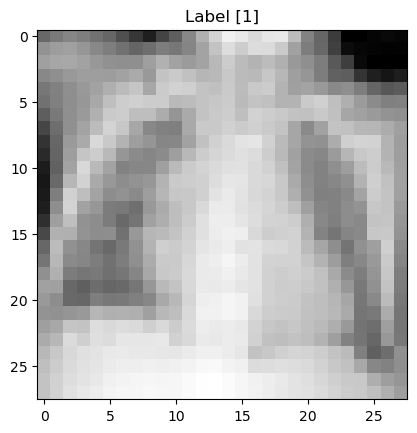

In [28]:
plt.figure()
plt.imshow(train_dataset[0]['img'].squeeze(), cmap='gray')
plt.title('Label {}'.format(train_dataset[0]['label']))
plt.show()

In [29]:
train_dataloader = monai.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

In [30]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(in_features=9216, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=1)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        output = self.fc2(x)
        return output
    
net = Net()

In [31]:
model = Net().to(gpu)

In [32]:
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4) 
loss_function = torch.nn.BCEWithLogitsLoss()

In [33]:
from tqdm import tqdm

def train_medmnist(model, train_dataloader, val_dataloader, optimizer, epochs, device=gpu, val_freq=1):
    train_loss = []
    val_loss = []

    for epoch in tqdm(range(epochs)):
        model.train()
        steps = 0
        epoch_loss = 0

        for batch in train_dataloader:
            optimizer.zero_grad()
            images = batch['img'].float().to(device)
            labels = batch['label'].float().to(device)
            output = model(images) 
            loss = loss_function(output, labels)
            epoch_loss += loss.item()
            loss.backward()
            optimizer.step()
            steps += 1
           
        train_loss.append(epoch_loss/steps)

        # validation loop
        if epoch % val_freq == 0:
            steps = 0
            val_epoch_loss = 0
            model.eval()
            for batch in val_dataloader:
                images = batch['img'].float().to(device)
                labels = batch['label'].float().to(device)
                output = model(images) 
                loss = loss_function(output, labels)
                val_epoch_loss += loss.item()
                steps += 1
            val_loss.append(val_epoch_loss/steps)

    return train_loss, val_loss, model

In [34]:
val_freq = 10
n_epochs = 100
train_loss, val_loss, model = train_medmnist(model, train_dataloader, val_dataloader, optimizer, epochs=n_epochs, val_freq=val_freq)

NameError: name 'val_dataloader' is not defined

In [35]:
from sklearn.metrics import roc_curve, auc

In [36]:
def validation_results_ROC(model, dataloader):
    for data in dataloader:
        images = data['img'].float().to(gpu)
        labels = data['label']
        with torch.no_grad():
            output = model(images).cpu()
        fpr, tpr, _ = roc_curve(labels, output.squeeze(1))
        print(auc(fpr, tpr))
        plt.plot(fpr,tpr)
        plt.xlabel('False positive rate')
        plt.ylabel('False negative rate')
        plt.plot([0,1], [0,1], 'r--')

In [37]:
def validation_results_visualize(model, dataset):
    index = np.random.randint(0, len(dataset))
    image = dataset[index]['img']
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    image = image.float().to(gpu)
    label = dataset[index]['label'].item()
    with torch.no_grad():
        output = F.sigmoid(model(image.unsqueeze(0)))
    plt.title(f'Ground truth: {label}, prediction: {int(output)}')

In [38]:
validation_results_visualize(model, val_dataset)

NameError: name 'val_dataset' is not defined